In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [9]:


xx = np.linspace(0,2*np.pi,30)
f = lambda x : np.exp(np.sin(x))

def compute_numerical_derivative(xx,fxx):
    n = len(xx)
    f_x = np.zeros((n))
    f_x[0] = (fxx[1] - fxx[0])/(xx[1] - xx[0])
    f_x[-1] = (fxx[-1] - fxx[-2])/(xx[-1] - xx[-2])
    for i in range(1,n-1):
        f_x[i] = (fxx[i+1] - fxx[i-1])/(xx[i+1] - xx[i-1])
    return f_x

f_x_actual = lambda x : np.exp(np.sin(x))*np.cos(x)



## 1

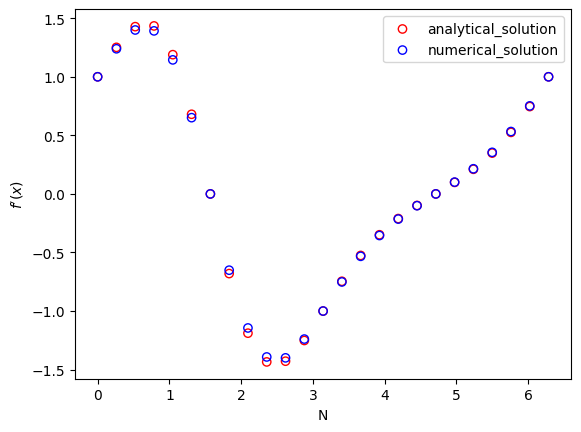

In [50]:
fig,ax = plt.subplots()
xx = np.linspace(0,2*np.pi,25)

ax.scatter(xx, f_x_actual(xx),label="analytical_solution",facecolor='none', edgecolors='red',)
ax.scatter(xx, compute_numerical_derivative(xx,f(xx)), label="numerical_solution",facecolor='none', edgecolors='blue',)

ax.set_xlabel('N')
ax.set_ylabel(r"$f'(x)$")
ax.legend()


## 2

slope p2 = -1.5044663669684644, slope pinf = -1.0298448818294033


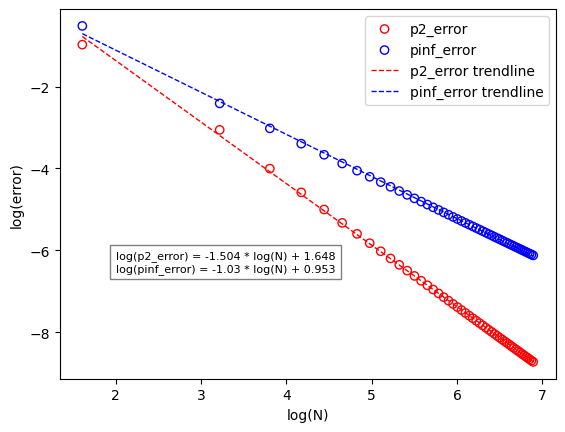

In [3]:
p2_error = np.zeros(50)
pinf_error = np.zeros(50)
nn = [20*i + 5 for i in range(50)]
for i,n in enumerate(nn) :
    xx = np.linspace(0,2*np.pi,n)
    fxx = f(xx)
    diff = f_x_actual(xx) - compute_numerical_derivative(xx,fxx)
    p2_error[i] = np.sqrt(np.sum(np.square(diff))) / np.sqrt(np.sum(np.square(f_x_actual(xx))))
    pinf_error[i] = np.max(np.abs(diff))/np.max(np.abs(f_x_actual(xx)))


fig,ax = plt.subplots()

ax.scatter(np.log(nn), np.log(p2_error), facecolor='none', edgecolors='red', label="p2_error")
ax.scatter(np.log(nn), np.log(pinf_error), facecolor='none', edgecolors='blue',label="pinf_error")

tlp2 = np.polyfit(np.log(nn), np.log(p2_error), 1)
tlpinf = np.polyfit(np.log(nn), np.log(pinf_error), 1)
# print([nn,np.ones(len(nn))])
p2_trend = np.dot(np.array(tlp2).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()
pinf_trend = np.dot(np.array(tlpinf).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()

ax.plot(np.log(nn), p2_trend, 'red', linewidth=1, linestyle = 'dashed',label="p2_error trendline")
ax.plot(np.log(nn), pinf_trend, 'blue', linewidth=1, linestyle = 'dashed',label="pinf_error trendline")

print(f'slope p2 = {tlp2[0]}, slope pinf = {tlpinf[0]}')

equation = "".join([f"log(p2_error) = {round(tlp2[0],3)} * log(N) + {round(tlp2[1],3)}",
                    "\n",
                    f"log(pinf_error) = {round(tlpinf[0],3)} * log(N) + {round(tlpinf[1],3)}"])

plt.text(2,-6.5, equation, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('log(N)')
ax.set_ylabel('log(error)')
ax.legend()


# Problem 2

In [57]:


xx = np.linspace(0,2*np.pi,30)

def compute_numerical_second_derivative(xx,fxx):
    n = len(xx)
    f_x = np.zeros((n))
    h = xx[1]-xx[0]
    # assert np.abs(xx[-2] - np.pi*2 - (-h/2 )) < .00000001
    #lol these were unintentionally the same line of code
    #f(x+h)-2f(h)+f(x-h)/2h^2
    f_x[0] = (fxx[1] -2*fxx[0]+ fxx[-2])/(h**2)
    f_x[-1] = (fxx[1] -2*fxx[0]+ fxx[-2])/(h**2)
    for i in range(1,n-1):
        f_x[i] = (fxx[i+1] -2*fxx[i] + fxx[i-1])/(h**2)
    return f_x




f_xx_actual = lambda x : -1 * np.sin(x) * np.exp(np.sin(x)) + np.exp(np.sin(x))*np.square(np.cos(x))




## 1

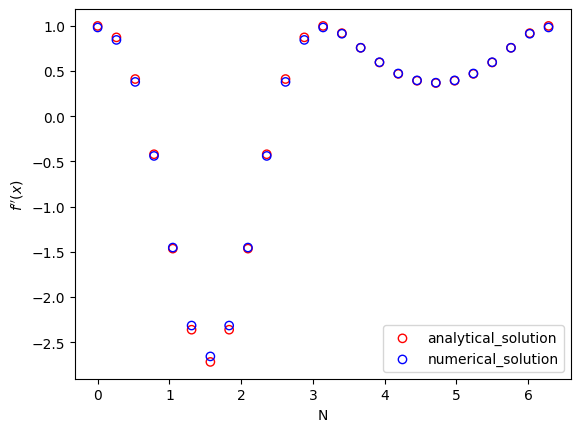

In [60]:
fig,ax = plt.subplots()
xx = np.linspace(0,2*np.pi,25)

ax.scatter(xx, f_xx_actual(xx),label="analytical_solution",facecolor='none', edgecolors='red',)
ax.scatter(xx, compute_numerical_second_derivative(xx,f(xx)), label="numerical_solution",facecolor='none', edgecolors='blue',)

ax.set_xlabel('N')
ax.set_ylabel(r"$f''(x)$",fontsize=10)
ax.legend()

## 2

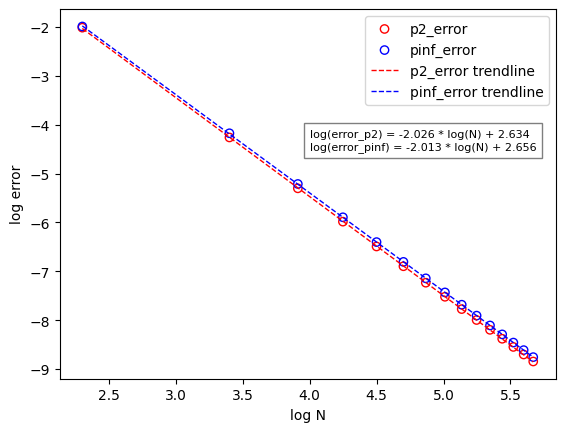

In [59]:
p2_error = np.zeros(15)
pinf_error = np.zeros(15)
nn = [20*i + 10 for i in range(15)]
for i,n in enumerate(nn):
    xx = np.linspace(0,2*np.pi,n)
    fx = f(xx)
    # f_x = compute_numerical_second_derivative(xx,fx)
    f_xx = compute_numerical_second_derivative(xx,fx)
    diff = f_xx_actual(xx) - f_xx
    p2_error[i] = np.sqrt(np.sum(np.square(diff))) / np.sqrt(np.sum(np.square(f_xx_actual(xx))))
    pinf_error[i] = np.max(np.abs(diff))/np.max(np.abs(f_xx_actual(xx)))



fig,ax = plt.subplots()

ax.scatter(np.log(nn), np.log(p2_error), facecolor='none', edgecolors='red', label="p2_error")
ax.scatter(np.log(nn), np.log(pinf_error), facecolor='none', edgecolors='blue',label="pinf_error")

tlp2 = np.polyfit(np.log(nn), np.log(p2_error), 1)
tlpinf = np.polyfit(np.log(nn), np.log(pinf_error), 1)
# print([nn,np.ones(len(nn))])
p2_trend = np.dot(np.array(tlp2).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()
pinf_trend = np.dot(np.array(tlpinf).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()

ax.plot(np.log(nn), p2_trend, 'red', linewidth=1, linestyle = 'dashed',label="p2_error trendline")
ax.plot(np.log(nn), pinf_trend, 'blue', linewidth=1, linestyle = 'dashed',label="pinf_error trendline")


# ax.set_xscale('log')
# ax.set_yscale('log')
equation = "".join([f"log(error_p2) = {round(tlp2[0],3)} * log(N) + {round(tlp2[1],3)}",
                    "\n",
                    f"log(error_pinf) = {round(tlpinf[0],3)} * log(N) + {round(tlpinf[1],3)}"])

plt.text(4,-4.5, equation, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))
ax.set_xlabel('log N')
ax.set_ylabel('log error')
ax.legend()


# Problem 2 - First attempt that worked

In [48]:

xx = np.linspace(0,2*np.pi,30)

def compute_numerical_derivative(xx,fxx):
    n = len(xx)
    f_x = np.zeros((n))
    h2 = xx[2]-xx[0]
    assert np.abs(xx[-2] - np.pi*2 - (-h2/2 )) < .00000001
    #lol these were unintentionally the same line of code
    f_x[0] = (fxx[1] - fxx[-2])/(h2)
    f_x[-1] = (fxx[1] - fxx[-2])/(h2)
    for i in range(1,n-1):
        f_x[i] = (fxx[i+1] - fxx[i-1])/(h2)
    return f_x




f_xx_actual = lambda x : -1 * np.sin(x) * np.exp(np.sin(x)) + np.exp(np.sin(x))*np.square(np.cos(x))

p2_error = np.zeros(15)
pinf_error = np.zeros(15)
nn = [5*i + 5 for i in range(15)]
for i,n in enumerate(nn) :
    xx = np.linspace(0,2*np.pi,n)
    fx = f(xx)
    f_x = compute_numerical_derivative(xx,fx)
    f_xx = compute_numerical_derivative(xx,f_x)
    diff = f_xx_actual(xx) - f_xx
    p2_error[i] = np.sqrt(np.sum(diff))
    pinf_error[i] = np.max(np.abs(diff))




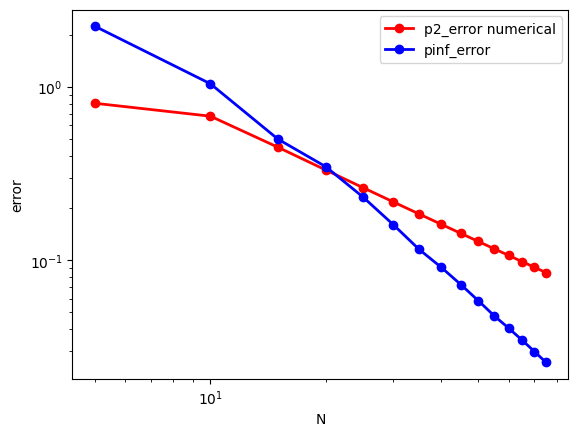

In [ ]:
fig,ax = plt.subplots()

ax.plot(nn, p2_error, 'red', linewidth=2, marker='o', label="p2_error numerical")
ax.plot(nn, pinf_error, 'blue', linewidth=2, marker='o', label="pinf_error")

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel('error')
ax.legend()
